In [50]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

def prox_cvx(x0):
    x = cvx.Variable()

    obj = cvx.Minimize(- cvx.power(x, alpha)  + cvx.sum_squares(x - x0)/2)
    cst = [0 <= x, x <= 1]
    prob = cvx.Problem(obj, cst)
    prob.solve()
    
    return x.value

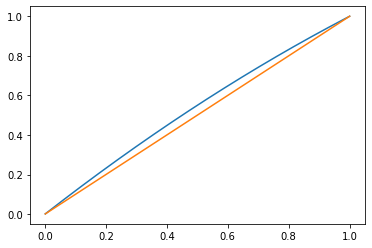

In [286]:
x = np.linspace(0,1,1000)[1:]
y = .2*x*(1-x) + x

plt.plot(x,y)
plt.plot(x,x)

In [248]:
alpha = np.random.rand()
alpha = .8
x0 = -np.random.rand()*2 - 10
alpha, x0

(0.8, -10.939608056609446)

In [249]:
# tough examples
# alpha, x0

# (0.29933371338536263, -1.8354108625113932)
# (0.5740541357315475, -0.8539168731035742)
# (0.7565236815450024, -1.4809823639852013)
# (0.3748094055174258, -0.8771498102721025)

#alpha, x0 = (0.5740541357315475, -0.8539168731035742)

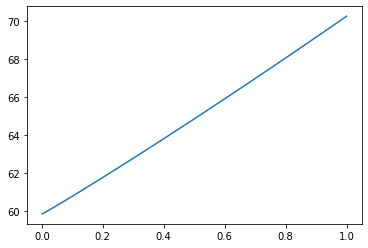

In [250]:
x = np.linspace(0,1,1000)[1:]
y = -np.power(x,alpha) + ((x - x0)**2)/2

plt.plot(x,y)

In [251]:
alpha-1

-0.19999999999999996

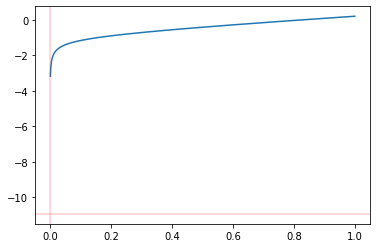

In [252]:
x = np.linspace(0,1,1000)[1:]
y = -alpha*np.power(x,alpha-1) + x

x_cvx = prox_cvx(x0)

plt.plot(x,y)
plt.axhline(x0, c='r', alpha=.2)
plt.axvline(x_cvx, c='r', alpha=.2)

In [253]:
x_cvx

array(2.31067665e-06)

In [254]:
def newt(alpha, x0, x):
    "x - f(x)/f'(x)"
    
    if x <= 0:
        return 0
    
    if x > 1:
        return 1
        
    f = -alpha*np.power(x, alpha-1) + x - x0
    fp = -alpha*(alpha - 1)*np.power(x, alpha-2) + 1
    
    return x - f/fp
    

In [255]:
x = 1

In [256]:
x = newt(alpha, x0, x)
x

-8.603110393628832

In [259]:
x = x_cvx
for _ in range(100):
    x = newt(alpha, x0, x)
x

2.0914173560466743e-06